# Experiment description
## Hypothesis: 
Quarrel phenomenon in Bogotá is periodic for different time windows
## Method: 
Fourier analysis to identify periodicity on time series signals
## Time windows: 
- Year (by days)
- Semester (by days)
- Trimester (by days)
- Month (by days)
- Years (by months)
- Month (by hour)
- Week (by hour)
- Day (by hour)

## Built-in methods

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import calendar
import scipy as sp
import scipy.fftpack
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [91]:
def low_pass_filter(signal, fc =0.04, b =0.08):
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)

    s = signal
    s = s - np.nanmean(s)
    filtered_signal = np.convolve(s, sinc_func)
    return filtered_signal

In [96]:
def fourier_analysis(signal):
    time = range(len(signal))
    fftdata = np.fft.fft(signal)
    fftdatafreq = np.zeros((len(signal)))

    for i in range(len(fftdata)):
        fftdatafreq[i] = abs(fftdata[i].real)

    plt.ylabel("Amplitude")
    plt.xlabel("Frequency")
    
    unilateral_fft = fftdatafreq[0:len(fftdatafreq) // 2]
    plt.plot(time[1:len(fftdatafreq) // 2], unilateral_fft[1:])
    return unilateral_fft

In [102]:
def get_max_frequencies(unilateral_fft_signal,fs_original_signal):
    max_freq = unilateral_fft_signal.argsort()[-10:][::-1]
    print('Max frequencies: ',max_freq)
    periodicity = fs_original_signal/max_freq
    print('Periods: ', periodicity)

## Data

In [93]:
data_location = '/Users/anamaria/Desktop/dev/security_project/datasets/verify_enrich_nuse_29112019.csv'
df_input = pd.read_csv(data_location,delimiter=",")

# Results
## Year (by days) analysis

In [4]:
df_input['date']=pd.to_datetime(df_input['FECHA'])
df_by_date = pd.DataFrame(df_input.groupby('date').size(),columns=["total_eventos"])

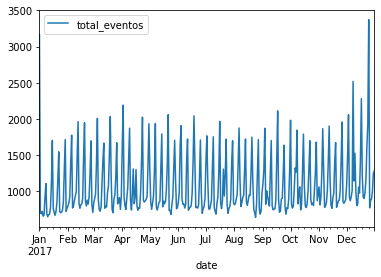

In [115]:
df_by_date.head(365).plot()

In [116]:
events_by_date = pd.Series(df_by_date['total_eventos']).values

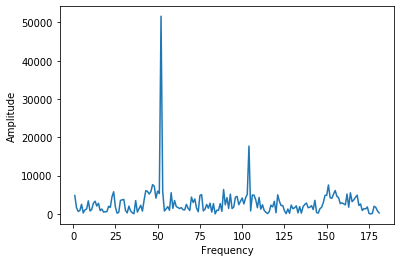

In [117]:
fft_events_in_year = fourier_analysis(events_by_date[0:365])

In [146]:
fs=len(events_by_date[0:365])
get_max_frequencies(fft_events_in_year,fs)

Max frequencies:  [  0  52 104  47 151  48  89 155  43  50]
Periods:  [       inf 7.01923077 3.50961538 7.76595745 2.41721854 7.60416667
 4.1011236  2.35483871 8.48837209 7.3       ]


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



## Semester (by days) analysis

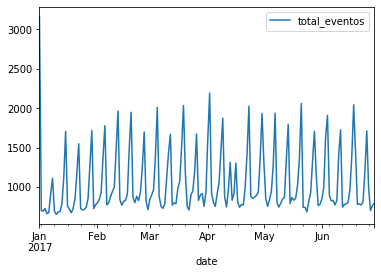

In [119]:
df_by_date.head(180).plot()

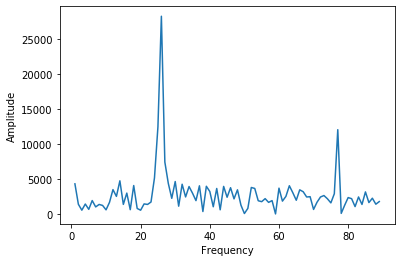

In [126]:
fft_events_in_semester = fourier_analysis(events_by_date[0:180])

In [147]:
fs=len(events_by_date[0:180])
get_max_frequencies(fft_events_in_semester,fs)

Max frequencies:  [ 0 26 25 77 27 24 14 30 28  1]
Periods:  [         inf   6.92307692   7.2          2.33766234   6.66666667
   7.5         12.85714286   6.           6.42857143 180.        ]


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



## Trimester (by days) analysis

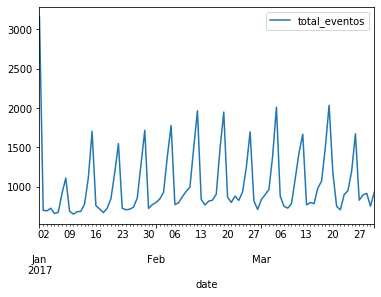

In [128]:
df_by_date.head(90).plot()

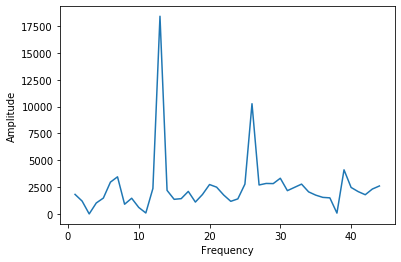

In [148]:
fft_events_in_trimester = fourier_analysis(events_by_date[0:90])

In [149]:
fs=len(events_by_date[0:90])
get_max_frequencies(fft_events_in_trimester,fs)

Max frequencies:  [ 0 13 26 39  7 30  6 28 29 25]
Periods:  [        inf  6.92307692  3.46153846  2.30769231 12.85714286  3.
 15.          3.21428571  3.10344828  3.6       ]


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



## Month (by days) analysis

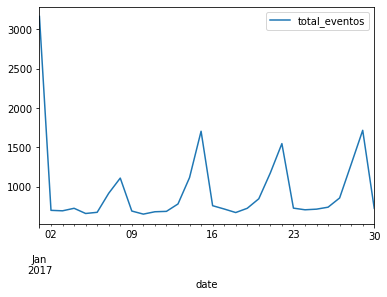

In [150]:
df_by_date.head(30).plot()

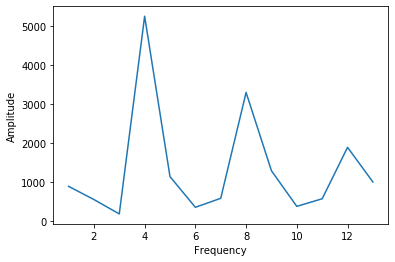

In [152]:
fft_events_in_month = fourier_analysis(events_by_date[31:60])

In [154]:
fs=len(events_by_date[31:60])
get_max_frequencies(fft_events_in_month,fs)

Max frequencies:  [ 0  4  8 12  9  5 13  1  7 11]
Periods:  [        inf  7.25        3.625       2.41666667  3.22222222  5.8
  2.23076923 29.          4.14285714  2.63636364]


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



## Years (by months) analysis

In [155]:
df_by_month = pd.DataFrame(df_input.groupby('PERIODO_TS').size(),columns=["total_eventos"])

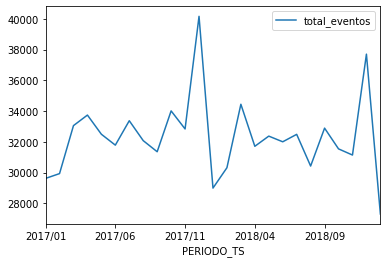

In [156]:
df_by_month.plot()

In [234]:
events_by_month = pd.Series(df_by_month['total_eventos']).values[:24]

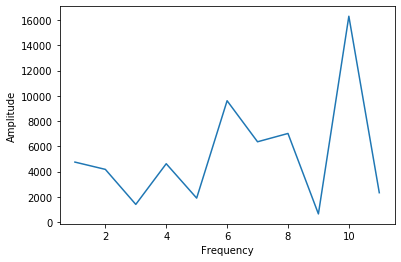

In [235]:
fft_events_in_year = fourier_analysis(events_by_month)

In [236]:
fs=len(events_by_month)
get_max_frequencies(fft_events_in_year,fs)

Max frequencies:  [ 0 10  6  8  7  1  4  2 11  5]
Periods:  [        inf  2.4         4.          3.          3.42857143 24.
  6.         12.          2.18181818  4.8       ]


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



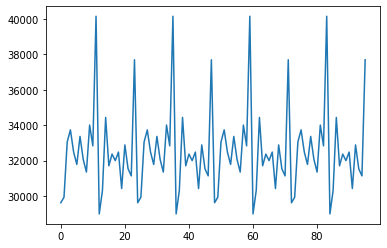

In [237]:
# Aggregate monthly time series to have more samples
month_ext = np.concatenate((events_by_month,events_by_month,events_by_month,events_by_month))
plt.plot(month_ext)

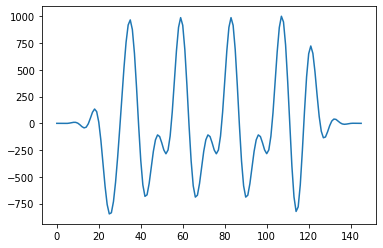

In [238]:
#Preprocess signal LPF
filtered = low_pass_filter(month_ext, fc =0.1, b =0.08)
plt.plot(filtered)

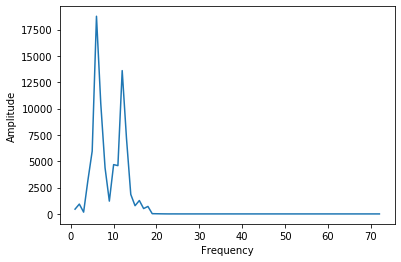

In [239]:
fft_events_in_year = fourier_analysis(filtered)

In [240]:
fs=len(filtered)
get_max_frequencies(fft_events_in_year,fs)

Max frequencies:  [ 6 12  7 13  5 10 11  8  4 14]
Periods:  [24.33333333 12.16666667 20.85714286 11.23076923 29.2        14.6
 13.27272727 18.25       36.5        10.42857143]


## Month (by hour, minutes)

In [241]:
df_input['time_stamp']=pd.to_datetime(df_input['FECHA'] + ' ' + df_input["HORA"].astype(str).str.rjust(4,'0'))

In [242]:
df_by_cdate = pd.DataFrame(df_input.groupby('time_stamp').size(),columns=["total_eventos"])

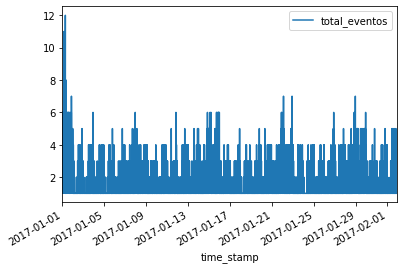

In [245]:
df_by_cdate.head(20000).plot()

In [246]:
one_month = pd.Series(df_by_cdate['total_eventos']).values[:20000]

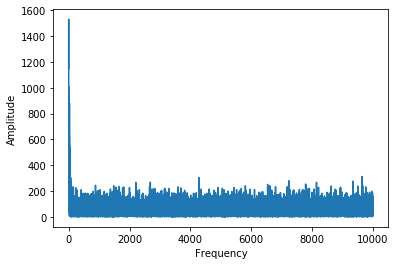

In [247]:
fft_events_in_month = fourier_analysis(one_month)

In [248]:
fs=len(one_month)
get_max_frequencies(fft_events_in_month,fs)

Max frequencies:  [ 0  2  1  3  9 27  5  6  7 23]
Periods:  [           inf 10000.         20000.          6666.66666667
  2222.22222222   740.74074074  4000.          3333.33333333
  2857.14285714   869.56521739]


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



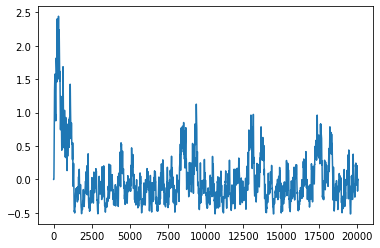

In [250]:
#Preprocess signal LPF
filtered = low_pass_filter(one_month, fc =0.01, b =0.08)
plt.plot(filtered)

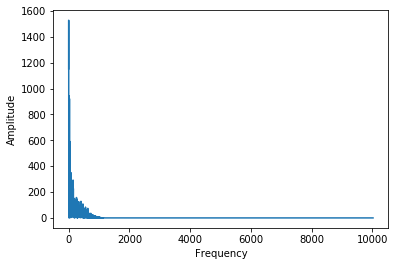

In [252]:
fft_events_in_month = fourier_analysis(filtered)

In [253]:
fs=len(filtered)
get_max_frequencies(fft_events_in_month,fs)

Max frequencies:  [ 2  1  3  9 27  5  6  7 41 29]
Periods:  [10025.         20050.          6683.33333333  2227.77777778
   742.59259259  4010.          3341.66666667  2864.28571429
   489.02439024   691.37931034]


## Week (by hour, minutes)

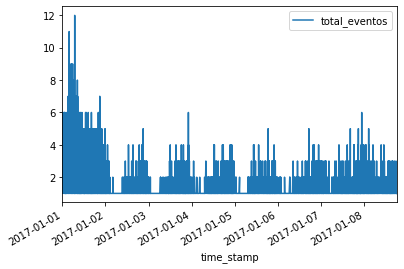

In [257]:
df_by_cdate.head(5000).plot()

In [264]:
one_week = pd.Series(df_by_cdate['total_eventos']).values[5000:10000]

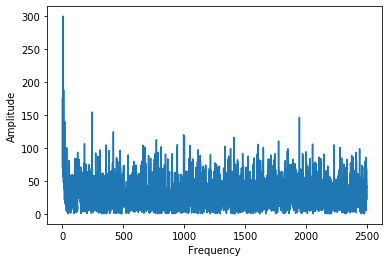

In [265]:
fft_events_in_week = fourier_analysis(one_week)

In [266]:
fs=len(one_week)
get_max_frequencies(fft_events_in_week,fs)

Max frequencies:  [   0    7   11    2  243    6    5 1946   20   12]
Periods:  [          inf  714.28571429  454.54545455 2500.           20.57613169
  833.33333333 1000.            2.56937307  250.          416.66666667]


/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



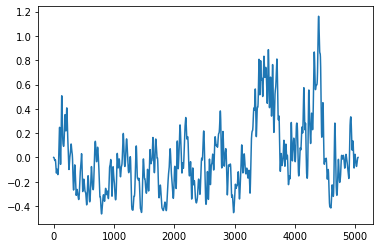

In [267]:
#Preprocess signal LPF
filtered = low_pass_filter(one_week, fc =0.01, b =0.08)
plt.plot(filtered)

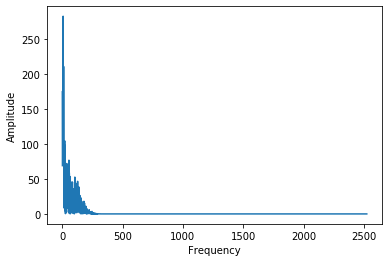

In [268]:
fft_events_in_week = fourier_analysis(filtered)

In [269]:
fs=len(filtered)
get_max_frequencies(fft_events_in_week,fs)

Max frequencies:  [ 7 11  2  6  5 12 20  9 17 19]
Periods:  [ 721.42857143  459.09090909 2525.          841.66666667 1010.
  420.83333333  252.5         561.11111111  297.05882353  265.78947368]
